<a href="https://colab.research.google.com/github/sandris1812-wq/DATA-CONURBANIA/blob/main/ProyectoDSParteI%2BGo%C3%B1i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`VISUALIZACIONES EN PHYTON`**

En este proyecto analizaré un negocio de ventas de remeras impresas en DTF.  Es un emprendimiento propio. El objetivo es conocer mejor cómo se comportan las ventas a lo largo del tiempo y qué factores pueden influir en las devoluciones de productos.
El dataset de 2000 registros, extraído de ChatGpt (que ya conoce mi emprendimiento), contiene información sobre las fechas de los pedidos, los canales de venta, las categorías de las prendas, los métodos de envío, los costos y las calificaciones que dejan los clientes.
Voy a plantear las siguientes hipótesis:

1. Durante campañas especiales (Hot Sale, Cyber Monday o Navidad) las ventas aumentan significativamente.
2.  Los canales digitales generan pedidos de mayor valor promedio que las ventas presenciales.
3. La calificación de los clientes se asocia positivamente con la rapidez del envío.




**Importar librerias/ información de dataset**




In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/sandris1812-wq/DATA-CONURBANIA/main/conurbania_ds_2000.csv", parse_dates=["order_date"])

In [17]:
# Dimensiones del dataset
print("Filas y columnas:", df.shape)

# Revisar tipos de datos
print(df.dtypes)

# Buscar valores faltantes
df.isnull().sum()


Filas y columnas: (2000, 35)
order_line_id                    int64
order_id                         int64
order_date              datetime64[ns]
customer_id                     object
repeat_customer                  int64
region                          object
channel                         object
acquisition_source              object
campaign                        object
category                        object
size                            object
color                           object
print_type                      object
design_theme                    object
dtf_supplier                    object
dtf_area_cm2                     int64
dtf_cost_per_cm2_ars           float64
base_cost_ars                  float64
labor_cost_ars                 float64
packaging_cost_ars             float64
shipping_method                 object
shipping_cost_ars              float64
units                            int64
price_list_unit_ars            float64
discount_pct                   floa

,0
order_line_id,0
order_id,0
order_date,0
customer_id,0
repeat_customer,0
region,0
channel,0
acquisition_source,0
campaign,0
category,0


**Gráfico univariado — Ventas totales a lo largo del tiempo**

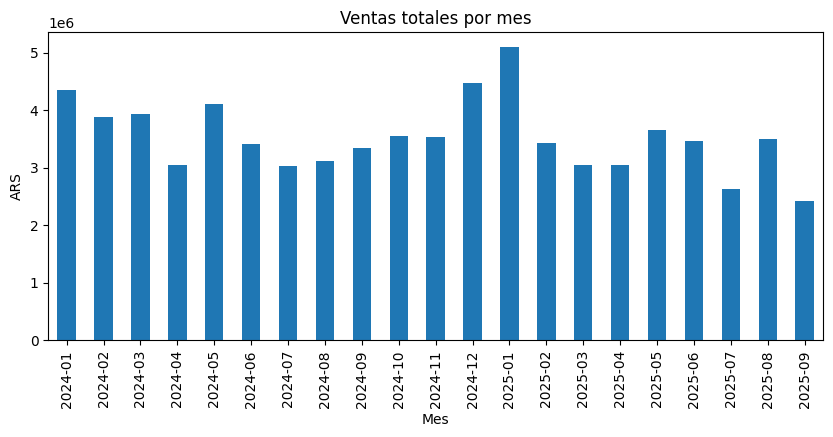

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'])

ventas_por_mes = df.groupby(df['order_date'].dt.to_period('M'))['order_total_ars'].sum()

ventas_por_mes.plot(kind='bar', figsize=(10,4))
plt.title("Ventas totales por mes")
plt.ylabel("ARS")
plt.xlabel("Mes")
plt.show()


En el gráfico se visualiza el monto total facturado por mes.  Y se observa que las ventas ascendieron en los meses de dic 2024 y de enero del 2025.  Se puede suponer que es por Navidad.

**Gráfico bivariado — Valor promedio por canal**

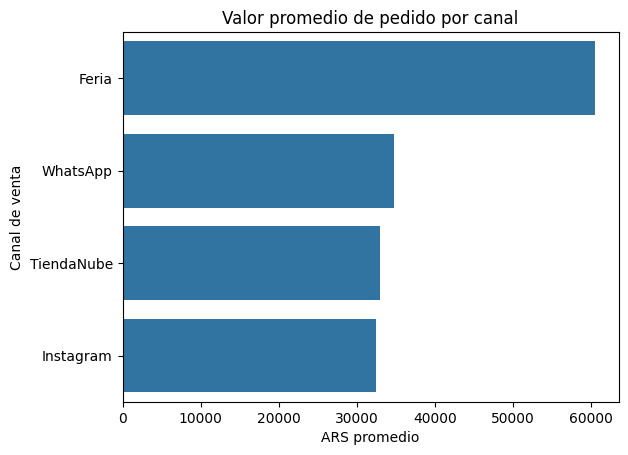

In [19]:
canal_promedio = df.groupby('channel')['order_total_ars'].mean().sort_values(ascending=False)

sns.barplot(x=canal_promedio.values, y=canal_promedio.index)
plt.title("Valor promedio de pedido por canal")
plt.xlabel("ARS promedio")
plt.ylabel("Canal de venta")
plt.show()


Hipótesis 2:  Según este primer analisis se visualiza que en feria (presencial) se destaca a los canales digitales en cantidad de pesos facturados.  Esto no indica que se vendan más productos.

**Gráfico multivariado — Relación entre calificación, rapidez y campaña**

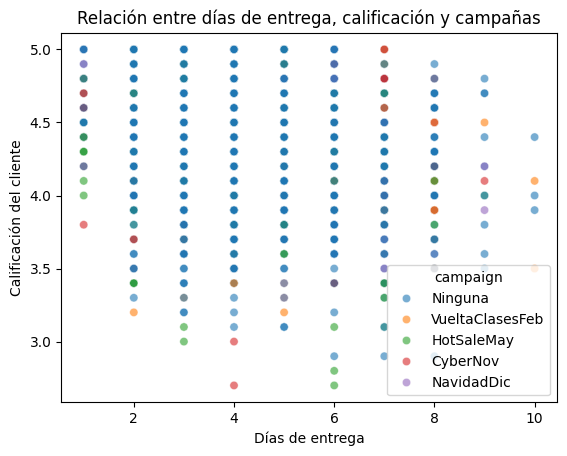

In [20]:
sns.scatterplot(
    data=df,
    x="delivery_time_days",
    y="customer_rating",
    hue="campaign",
    alpha=0.6
)
plt.title("Relación entre días de entrega, calificación y campañas")
plt.xlabel("Días de entrega")
plt.ylabel("Calificación del cliente")
plt.show()


Hipótesis:  En este primer analisis se observa que la mayor calificación de los cientes se concentra en menos cantidad de días de entrega, independientemente de la campaña.